In [12]:
# # run to install required packages
import sys
# !{sys.executable} -m pip install keyring keyrings.alt ipython-secrets
# !{sys.executable} -m pip install matplotlib seaborn

In [2]:
from nixtla import NixtlaClient

In [3]:
import keyring
from keyrings.alt.file import PlaintextKeyring
keyring.set_keyring(PlaintextKeyring())

In [4]:
from ipython_secrets import *
NIXTLA_KEY = get_secret('NIXTLA_KEY')

In [6]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_KEY
)

In [7]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [8]:
import pandas as pd

_Toy example_ (from Quickstart) - `AirPassengers` dataset: number of monthly airline passengers in Australia between 1949 and 1960

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
INFO:matplotlib.font_manager:generated new fontManager


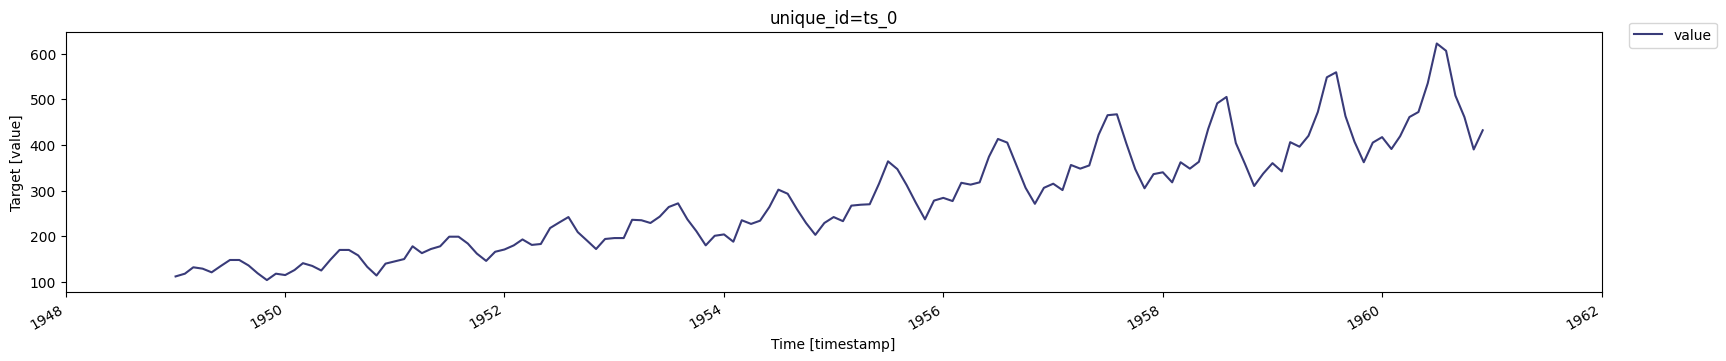

In [13]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

In [14]:
timegpt_fcst_df = nixtla_client.forecast(df=df, 
                                         h=12, 
                                         freq='MS', 
                                         time_col='timestamp', 
                                         target_col='value')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.83795
1,1961-02-01,426.06274
2,1961-03-01,463.11658
3,1961-04-01,478.24450
4,1961-05-01,505.64648


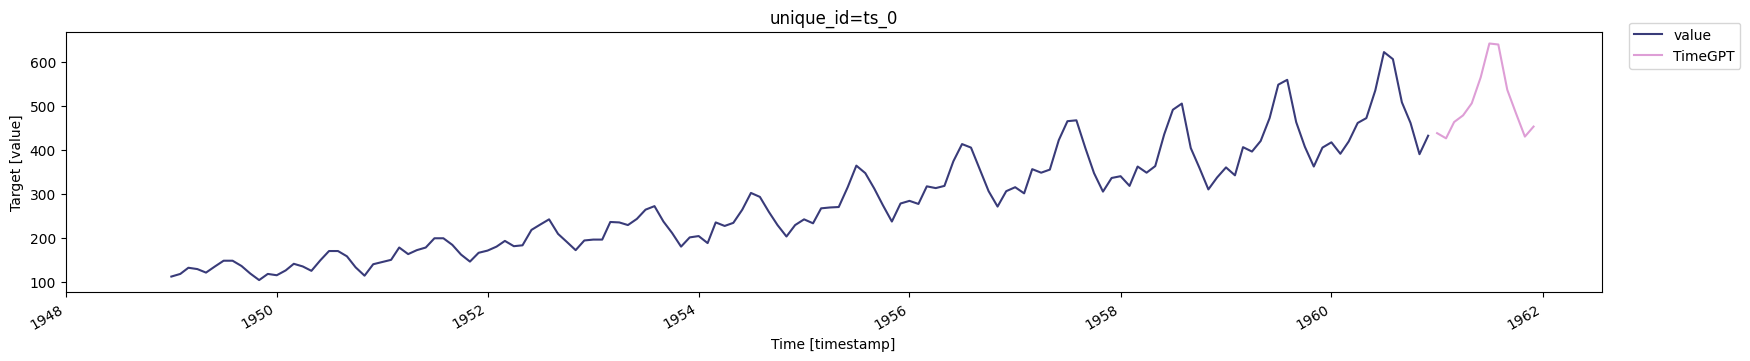

In [15]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


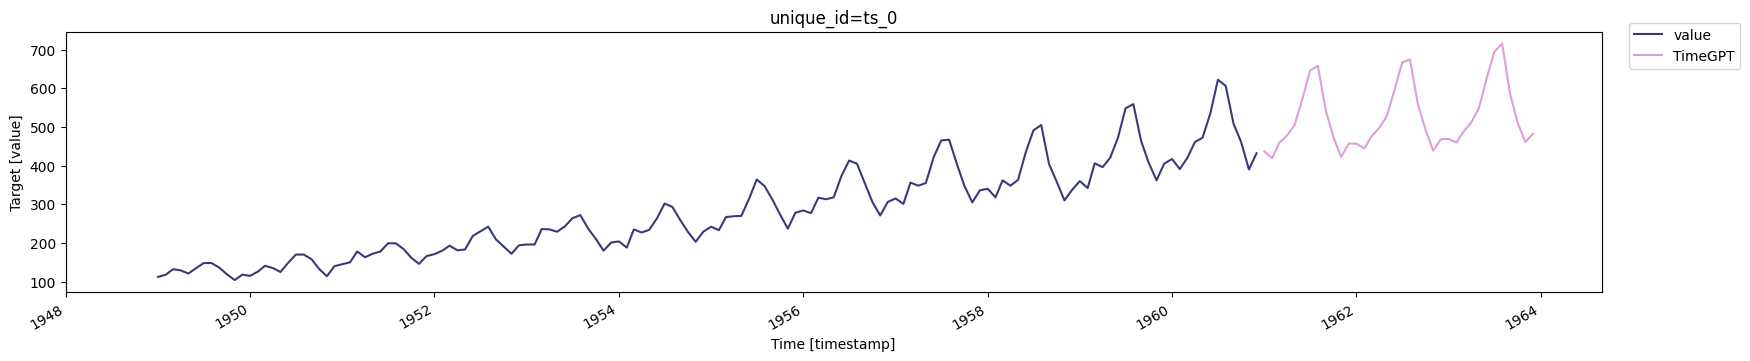

In [16]:
# Longer term:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=36, time_col='timestamp', target_col='value', freq='MS', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')